In [48]:
import re
# Question 1

import re

def clean_html(html):
    # Remove HTML tags
    clean_text = re.sub(r'> ', '>', html)
    # Remove HTML tags
    clean_text = re.sub(r'<[^>]+>', '', clean_text)
    # Remove extra whitespaces
    clean_text = re.sub(r'[\t]', '', clean_text)
    return clean_text.strip()

html_content = """
<body>

	<div id="header">
		<h1>CSC3160 Fundamentals of Speech and Language Processing</h1>
		<h1> MDS6002 Natural Language Processing</h1>
		<div class="text-center">
			<h4>Spring 2023</h4>
		</div>
	</div>

	<div class="sechighlight">
		<div class="container sec">
			<div id="coursedesc">
				The difference between speech and language processing and other data processing is the use of knowledge
				of language. In this course, we will study how to describe, process and compute different levels of
				language knowledge including Phonetics and Phonology, Morphology, Syntax, Semantics, and how the
				language knowledge is used in speech and language applications such as named entities recognition,
				information extraction, question answering, speech recognition, and speech synthesis.
			</div>
		</div>
	</div>

</body>
"""

cleaned_text = clean_html(html_content)
print(cleaned_text)

CSC3160 Fundamentals of Speech and Language Processing
MDS6002 Natural Language Processing

Spring 2023






The difference between speech and language processing and other data processing is the use of knowledge
of language. In this course, we will study how to describe, process and compute different levels of
language knowledge including Phonetics and Phonology, Morphology, Syntax, Semantics, and how the
language knowledge is used in speech and language applications such as named entities recognition,
information extraction, question answering, speech recognition, and speech synthesis.


[1, 2, 3, 4, 5, 6, 7, 8]


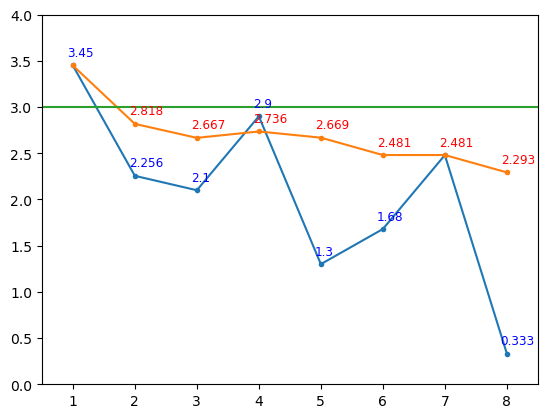

In [124]:
import matplotlib.pyplot as plt
import numpy as np

TG = [3.450, 2.256, 2.100, 2.900, 1.300, 1.680, 2.480, 0.333]
CG = [3.450, 2.818, 2.667, 2.736, 2.669, 2.481, 2.481, 2.293]
term = []
for i in range(8):
    term.append(i+1)
print(term)
plt.plot(term,TG,'.-')
plt.plot(term,CG,'.-')
for x,y in zip(term,TG):
    if x != 7:
        plt.text(x-0.1,y+0.1,y,color='blue',fontsize=8.6)
for x,y in zip(term[1:],CG[1:]):
    plt.text(x-0.1,y+0.1,y,color='red',fontsize=8.6)
plt.plot([3,3,3,3,3,3,3,3,3,3])
plt.xlim((0.5,8.5))
plt.ylim((0,4))
plt.show()

In [136]:
import re, collections

def get_stats(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def merge_vocab(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

def get_tokens(vocab):
    tokens = collections.defaultdict(int)
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens[token] += freq
    return tokens

vocab = {'l o w': 5, 'l o w e r': 2, 'n e w e s t': 6, 'w i d e s t': 3}
print('==========')
print('Tokens Before BPE')
tokens = get_tokens(vocab)
print('Tokens: {}'.format(tokens))
print('Number of tokens: {}'.format(len(tokens)))
print('==========')

num_merges = 5
for i in range(num_merges):
    pairs = get_stats(vocab)
    if not pairs:
        break
    best = max(pairs, key=pairs.get)
    vocab = merge_vocab(best, vocab)
    print('Iter: {}'.format(i))
    print('Best pair: {}'.format(best))
    tokens = get_tokens(vocab)
    print('Tokens: {}'.format(tokens))
    print('Number of tokens: {}'.format(len(tokens)))



Tokens Before BPE
Tokens: defaultdict(<class 'int'>, {'l': 7, 'o': 7, 'w': 16, 'e': 17, 'r': 2, 'n': 6, 's': 9, 't': 9, 'i': 3, 'd': 3})
Number of tokens: 10
Iter: 0
Best pair: ('e', 's')
Tokens: defaultdict(<class 'int'>, {'l': 7, 'o': 7, 'w': 16, 'e': 8, 'r': 2, 'n': 6, 'es': 9, 't': 9, 'i': 3, 'd': 3})
Number of tokens: 10
Iter: 1
Best pair: ('es', 't')
Tokens: defaultdict(<class 'int'>, {'l': 7, 'o': 7, 'w': 16, 'e': 8, 'r': 2, 'n': 6, 'est': 9, 'i': 3, 'd': 3})
Number of tokens: 9
Iter: 2
Best pair: ('l', 'o')
Tokens: defaultdict(<class 'int'>, {'lo': 7, 'w': 16, 'e': 8, 'r': 2, 'n': 6, 'est': 9, 'i': 3, 'd': 3})
Number of tokens: 8
Iter: 3
Best pair: ('lo', 'w')
Tokens: defaultdict(<class 'int'>, {'low': 7, 'e': 8, 'r': 2, 'n': 6, 'w': 9, 'est': 9, 'i': 3, 'd': 3})
Number of tokens: 8
Iter: 4
Best pair: ('n', 'e')
Tokens: defaultdict(<class 'int'>, {'low': 7, 'e': 2, 'r': 2, 'ne': 6, 'w': 9, 'est': 9, 'i': 3, 'd': 3})
Number of tokens: 8


In [137]:
vocab

{'low': 5, 'low e r': 2, 'ne w est': 6, 'w i d est': 3}

In [147]:
import re, collections

def RetrievePairs(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def PerformMerge(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

def RetrieveTokens(vocab):
    tokens = collections.defaultdict(int)
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens[token] += freq
    return tokens


vocab = { 'o n e u m o n o u l t r a m i c r o s c o p i c s i l i c o v o l c a n o c o n i o s i s': 2, 
      'h i p p o p o t o m o n s t r o s e s q u i p p e d a l i o p h o b i a': 5, 
      's u p e r c a l i f r a g i l i s t i c e x p i a l i d o c i o u s': 4, 
      'p s e u d o p s e u d o h y p o p a r a t h y r o i d i s m': 1,
      'f l o c c i n a u c i n i h i l i p i l i f i c a t i o n': 6,
      'a n t i d i s e s t a b l i s h m e n t a r i a n i s m': 2,
      'h o n o r i f i c a b i l i t u d i n i t a t i b u s': 5}
print('==========')
print('Tokens Before BPE')
tokens = RetrieveTokens(vocab)
print('Tokens: {}'.format(tokens))
print('Number of tokens: {}'.format(len(tokens)))
print('==========')



num_merges = 5
for i in range(num_merges):
    pairs = RetrievePairs(vocab)
    if not pairs:
        break
    best = max(pairs, key=pairs.get)
    vocab = PerformMerge(best, vocab)
    tokens = RetrieveTokens(vocab)
    print('🔜Iteration',i+1)
    print('\tBest Pair:',best)
    print('\tTokens:',tokens)
    print('\tToken Number:',len(tokens))
print(vocab)

Tokens Before BPE
Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 48, 't': 44, 'r': 26, 'a': 58, 'i': 161, 'c': 53, 's': 51, 'p': 50, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
Number of tokens: 22
🔜Iteration 1
	Best Pair: ('l', 'i')
	Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 10, 't': 44, 'r': 26, 'a': 58, 'i': 123, 'c': 53, 's': 51, 'p': 50, 'li': 38, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
	Token Number: 23
🔜Iteration 2
	Best Pair: ('i', 'li')
	Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 10, 't': 44, 'r': 26, 'a': 58, 'i': 100, 'c': 53, 's': 51, 'p': 50, 'ili': 23, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'li': 15, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
	Token Number: 24
🔜Iteration 3
	Best Pair: ('o', 'n')
	Tokens: defaultdict(<class 'int'>, {'on': 22, 'e': 26, 'u': 35, 'm': 14, 'o': 67, 'l': 10

In [148]:
import re, collections

def RetrievePairs(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def PerformMerge(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

def RetrieveTokens(vocab):
    tokens = collections.defaultdict(int)
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens[token] += freq
    return tokens

def RetrieveResult(vocab):
  global pairs, best, tokens
  pairs = RetrievePairs(vocab)
  best = max(pairs, key=pairs.get)
  vocab = PerformMerge(best, vocab)
  tokens = RetrieveTokens(vocab)
  print('🔜Iteration',i+1)
  print('\tBest Pair:',best)
  print('\tTokens:',tokens)
  print('\tToken Number:',len(tokens))

vocab = { 'o n e u m o n o u l t r a m i c r o s c o p i c s i l i c o v o l c a n o c o n i o s i s': 2, 
      'h i p p o p o t o m o n s t r o s e s q u i p p e d a l i o p h o b i a': 5, 
      's u p e r c a l i f r a g i l i s t i c e x p i a l i d o c i o u s': 4, 
      'p s e u d o p s e u d o h y p o p a r a t h y r o i d i s m': 1,
      'f l o c c i n a u c i n i h i l i p i l i f i c a t i o n': 6,
      'a n t i d i s e s t a b l i s h m e n t a r i a n i s m': 2,
      'h o n o r i f i c a b i l i t u d i n i t a t i b u s': 5}
tokens = RetrieveTokens(vocab)
print('Tokens Before BPE:')
print(tokens)
print('Token Number:',len(tokens))
print('\n\n=====   !BPE ITERATION START!   =====')

num_merges = 5
for i in range(num_merges): #Perform BPE iteration 
  pairs = RetrievePairs(vocab)
  if not pairs:      #Check if need to end process
    break
  RetrieveResult(vocab)
print('🔜🔜🔜Final Result:', vocab)


Tokens Before BPE:
defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 48, 't': 44, 'r': 26, 'a': 58, 'i': 161, 'c': 53, 's': 51, 'p': 50, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
Token Number: 22


=====   !BPE ITERATION START!   =====
🔜Iteration 1
	Best Pair: ('l', 'i')
	Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 10, 't': 44, 'r': 26, 'a': 58, 'i': 123, 'c': 53, 's': 51, 'p': 50, 'li': 38, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
	Token Number: 23
🔜Iteration 2
	Best Pair: ('l', 'i')
	Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 10, 't': 44, 'r': 26, 'a': 58, 'i': 123, 'c': 53, 's': 51, 'p': 50, 'li': 38, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
	Token Number: 23
🔜Iteration 3
	Best Pair: ('l', 'i')
	Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 

In [142]:
import re, collections

def RetrievePairs(vocab):
    pairs = collections.defaultdict(int)
    for word, freq in vocab.items():
        symbols = word.split()
        for i in range(len(symbols)-1):
            pairs[symbols[i],symbols[i+1]] += freq
    return pairs

def PerformMerge(pair, v_in):
    v_out = {}
    bigram = re.escape(' '.join(pair))
    p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
    for word in v_in:
        w_out = p.sub(''.join(pair), word)
        v_out[w_out] = v_in[word]
    return v_out

def RetrieveTokens(vocab):
    tokens = collections.defaultdict(int)
    for word, freq in vocab.items():
        word_tokens = word.split()
        for token in word_tokens:
            tokens[token] += freq
    return tokens

def RetrieveResult(vocab):
  pairs = RetrievePairs(vocab)
  best = max(pairs, key=pairs.get)
  vocab = PerformMerge(best, vocab)
  tokens = RetrieveTokens(vocab)
  print('🔜Iteration',i+1)
  print('\tBest Pair:',best)
  print('\tTokens:',tokens)
  print('\tToken Number:',len(tokens))

vocab = { 'o n e u m o n o u l t r a m i c r o s c o p i c s i l i c o v o l c a n o c o n i o s i s': 2, 
      'h i p p o p o t o m o n s t r o s e s q u i p p e d a l i o p h o b i a': 5, 
      's u p e r c a l i f r a g i l i s t i c e x p i a l i d o c i o u s': 4, 
      'p s e u d o p s e u d o h y p o p a r a t h y r o i d i s m': 1,
      'f l o c c i n a u c i n i h i l i p i l i f i c a t i o n': 6,
      'a n t i d i s e s t a b l i s h m e n t a r i a n i s m': 2,
      'h o n o r i f i c a b i l i t u d i n i t a t i b u s': 5}
tokens = RetrieveTokens(vocab)
print('Tokens Before BPE:')
print(tokens)
print('Token Number:',len(tokens))
print('\n\n=====   !BPE ITERATION START!   =====')

num_merges = 5
for i in range(num_merges): #Perform BPE iteration 
  pairs = RetrievePairs(vocab)
  if not pairs:      #Check if need to end process
    break
  RetrieveResult(vocab)
print('🔜🔜🔜Final Result:', vocab)
vocab

Tokens Before BPE:
defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 48, 't': 44, 'r': 26, 'a': 58, 'i': 161, 'c': 53, 's': 51, 'p': 50, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
Token Number: 22


=====   !BPE ITERATION START!   =====
🔜Iteration 1
	Best Pair: ('l', 'i')
	Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 10, 't': 44, 'r': 26, 'a': 58, 'i': 123, 'c': 53, 's': 51, 'p': 50, 'li': 38, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
	Token Number: 23
🔜Iteration 2
	Best Pair: ('l', 'i')
	Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 'm': 14, 'l': 10, 't': 44, 'r': 26, 'a': 58, 'i': 123, 'c': 53, 's': 51, 'p': 50, 'li': 38, 'v': 2, 'h': 25, 'q': 5, 'd': 19, 'b': 17, 'f': 21, 'g': 4, 'x': 4, 'y': 2})
	Token Number: 23
🔜Iteration 3
	Best Pair: ('l', 'i')
	Tokens: defaultdict(<class 'int'>, {'o': 89, 'n': 47, 'e': 26, 'u': 35, 

{'o n e u m o n o u l t r a m i c r o s c o p i c s i l i c o v o l c a n o c o n i o s i s': 2,
 'h i p p o p o t o m o n s t r o s e s q u i p p e d a l i o p h o b i a': 5,
 's u p e r c a l i f r a g i l i s t i c e x p i a l i d o c i o u s': 4,
 'p s e u d o p s e u d o h y p o p a r a t h y r o i d i s m': 1,
 'f l o c c i n a u c i n i h i l i p i l i f i c a t i o n': 6,
 'a n t i d i s e s t a b l i s h m e n t a r i a n i s m': 2,
 'h o n o r i f i c a b i l i t u d i n i t a t i b u s': 5}